# An example of Owl

The chart in this example is introduced in https://github.com/ryanrhymes/owl/wiki/Tutorial:-How-to-Plot-in-Owl%3F.

In [1]:
#thread
#require "owl,jupyter.notebook"

In [2]:
open Owl

In [3]:
let f p i = match i with
  | 0 -> Stats.Rnd.gaussian ~sigma:0.5 () +. p.(1)
  | _ -> Stats.Rnd.gaussian ~sigma:0.1 () *. p.(0)
in
let y = Stats.gibbs_sampling f [|0.1;0.1|] 5_000 |> Mat.of_arrays in
let h = Plot.create ~m:2 ~n:2 "/tmp/owl.png" in
Plot.set_background_color h 255 255 255;
(* focus on the subplot at 0,0 *)
Plot.subplot h 0 0;
Plot.set_title h "Bivariate model";
Plot.scatter ~h (Mat.col y 0) (Mat.col y 1);
(* focus on the subplot at 0,1 *)
Plot.subplot h 0 1;
Plot.set_title h "Distribution of y";
Plot.set_xlabel h "y";
Plot.set_ylabel h "Frequency";
Plot.histogram ~h ~bin:50 (Mat.col y 1);
(* focus on the subplot at 1,0 *)
Plot.subplot h 1 0;
Plot.set_title h "Distribution of x";
Plot.set_ylabel h "Frequency";
Plot.histogram ~h ~bin:50 (Mat.col y 0);
(* focus on the subplot at 1,1 *)
Plot.subplot h 1 1;
Plot.set_foreground_color h 0 50 255;
Plot.set_title h "Sine function";
Plot.(plot_fun ~h ~line_style:2 Maths.sin 0. 28.);
Plot.autocorr ~h (Mat.sequential 1 28);
(* output your final plot *)
Plot.output h;;

- : unit = ()


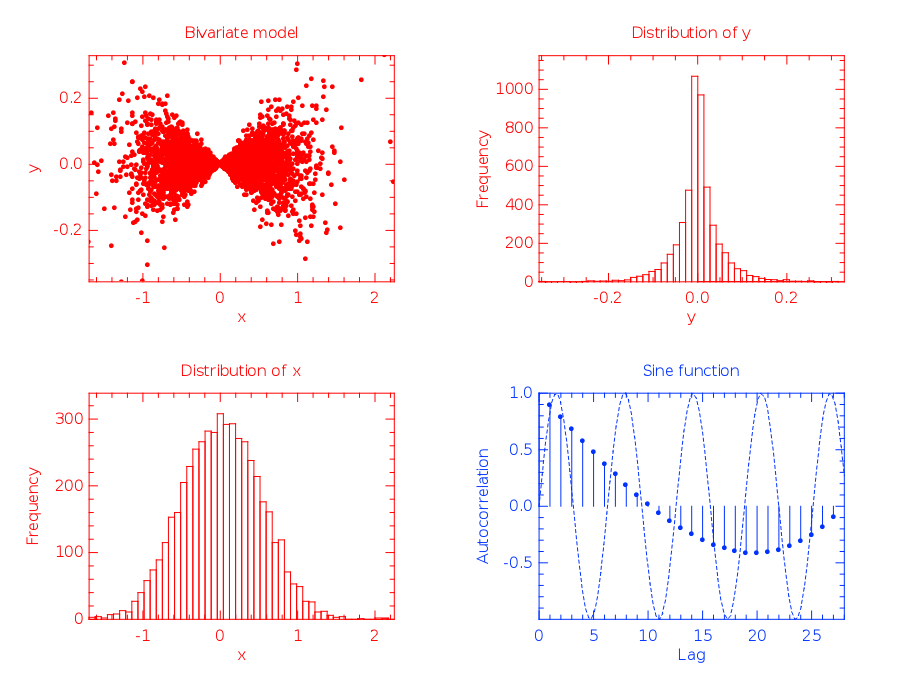

- : unit = ()


In [4]:
let ic = open_in_bin "/tmp/owl.png" in
let n = in_channel_length ic in
let data = really_input_string ic n in
close_in ic ;
Jupyter_notebook.display ~base64:true "image/png" data